In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
tsla_data = pd.read_csv('../data/TSLA_data_cleaned.csv')

In [3]:
tsla_data.head

<bound method NDFrame.head of       Date                     Date.1        Open        High         Low  \
0        0  2015-01-02 00:00:00+00:00   14.620667   14.620667   14.883333   
1        1  2015-01-05 00:00:00+00:00   14.006000   14.006000   14.433333   
2        2  2015-01-06 00:00:00+00:00   14.085333   14.085333   14.280000   
3        3  2015-01-07 00:00:00+00:00   14.063333   14.063333   14.318667   
4        4  2015-01-08 00:00:00+00:00   14.041333   14.041333   14.253333   
...    ...                        ...         ...         ...         ...   
2469  2469  2024-10-24 00:00:00+00:00  260.480011  260.480011  262.119995   
2470  2470  2024-10-25 00:00:00+00:00  269.190002  269.190002  269.489990   
2471  2471  2024-10-28 00:00:00+00:00  262.510010  262.510010  273.540009   
2472  2472  2024-10-29 00:00:00+00:00  259.519989  259.519989  264.980011   
2473  2473  2024-10-30 00:00:00+00:00  257.549988  257.549988  263.350006   

           Close   Adj Close     Volume  
0  

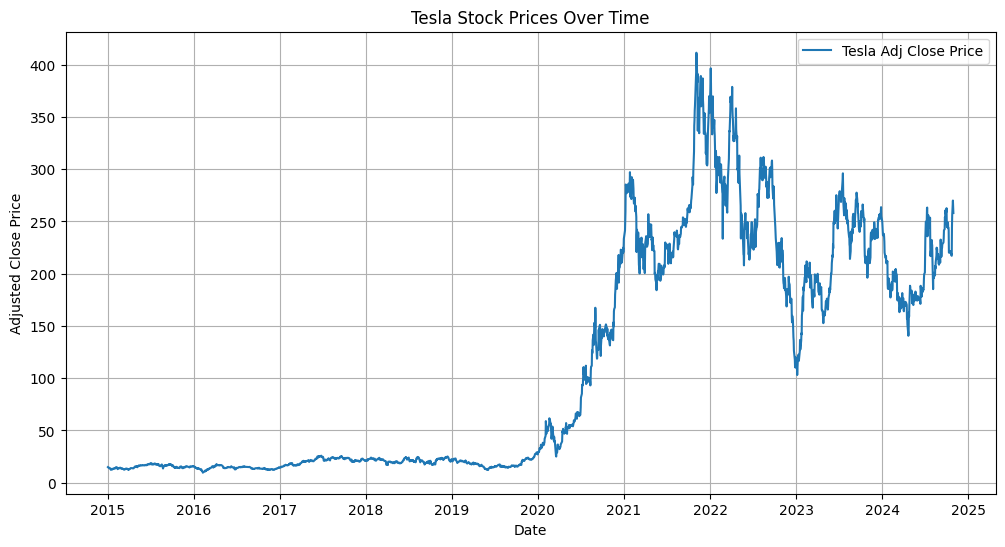

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the 'Date.1' column as datetime
tsla_data['Date.1'] = pd.to_datetime(tsla_data['Date.1'])

# Set 'Date.1' as the index
tsla_data.set_index('Date.1', inplace=True)

# Plot the Adjusted Close prices
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Adj Close'], label='Tesla Adj Close Price')
plt.title("Tesla Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()


c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2474
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8016.084
Date:                Sat, 16 Nov 2024   AIC                          16038.168
Time:                        20:36:10   BIC                          16055.607
Sample:                             0   HQIC                         16044.502
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7392      0.083     -8.917      0.000      -0.902      -0.577
ma.L1          0.6937      0.088      7.922      0.000       0.522       0.865
sigma2        38.2832      0.473     80.923      0.0

c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


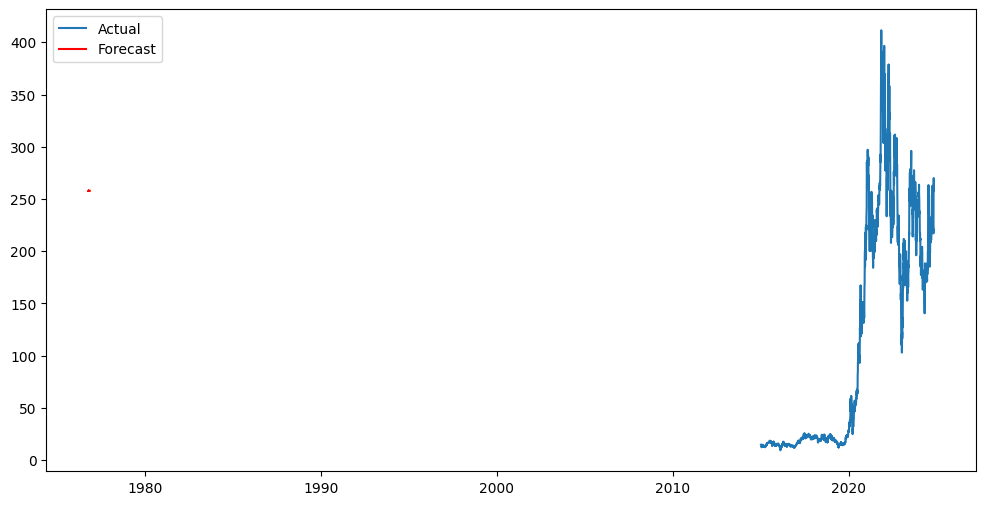

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Differencing to make data stationary (if needed)
tsla_data['Differenced'] = tsla_data['Adj Close'].diff().dropna()

# Fit ARIMA model
model = ARIMA(tsla_data['Adj Close'], order=(1, 1, 1))  # p, d, q
arima_result = model.fit()

# Forecasting
forecast = arima_result.forecast(steps=30)  # Forecast 30 days into the future
print(arima_result.summary())

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Adj Close'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(my_data['Target_Column'])
print(f"ADF P-Value: {adf_result[1]}")

kpss_result = kpss(my_data['Target_Column'], nlags="auto")
print(f"KPSS P-Value: {kpss_result[1]}")


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(tsla_data['Target_Column'])
print(f"ADF P-Value: {adf_result[1]}")

kpss_result = kpss(tsla['Target_Column'], nlags="auto")
print(f"KPSS P-Value: {kpss_result[1]}")
z

KeyError: 'Target_Column'

: 

In [ ]:
auto_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", trace=True)
print(auto_model.summary())